### Importing Libraries

In [89]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [90]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

# Problem Statement
## Consider only the below columns and prepare a prediction model for predicting Price.

+ <b>Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
                         
Model -- model of the car <br />
Price  -- Offer Price in EUROs	<br />
Age_08_04 -- Age in months as in August 2004	<br />
KM -- Accumulated Kilometers on odometer<br />
HP -- Horse Power<br />
cc -- Cylinder Volume in cubic centimeters<br />
Doors -- Number of doors<br />
Gears -- Number of gear positions<br />
Quarterly_Tax -- Quarterly road tax in EUROs<br />
Weight -- Weight in Kilograms<br />

### Importing Dataset

In [91]:
raw_data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [92]:
print('Number of Rows{}Columns'.format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [93]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Descriptive Analysis

In [94]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


#### ^Observation: There are some missing values in the Data set by reading Counts from Above

### Checking for Data types

In [95]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### ^Observation: all the data types are correct .

### Renaming the columns name and making it short

In [96]:
data=raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Checking for missing values

In [97]:
data[data.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### ^Observation: Notice there are no '0' values in the dataset

In [98]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

### Visualizing Missing Values

<Axes: >

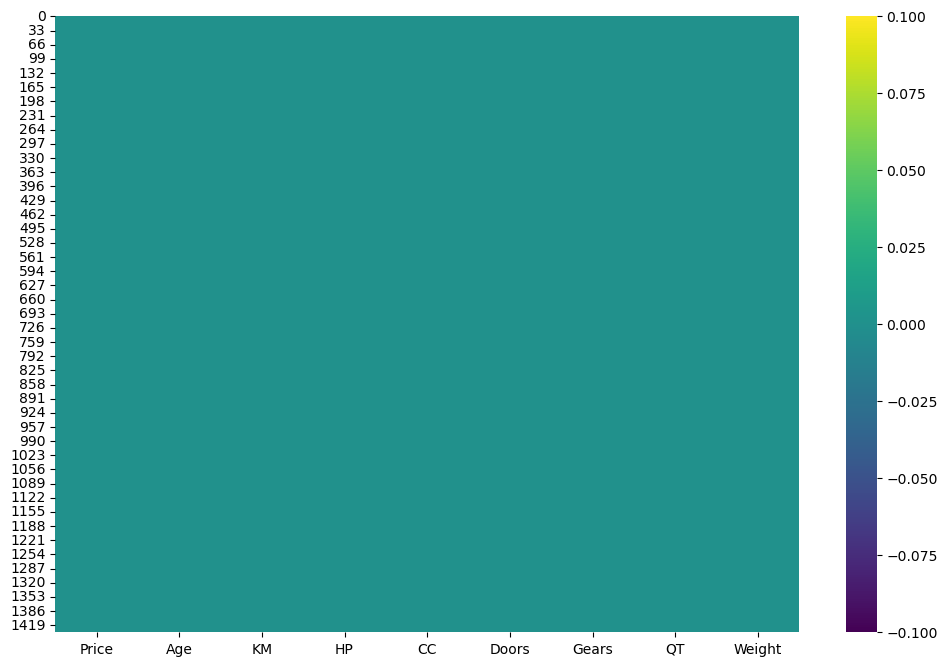

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

#### ^Observation: Feature 'HP' has missing Values in the data set
+ We will have to handle the missing values by observing the distribution and making the optimal choice

In [100]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

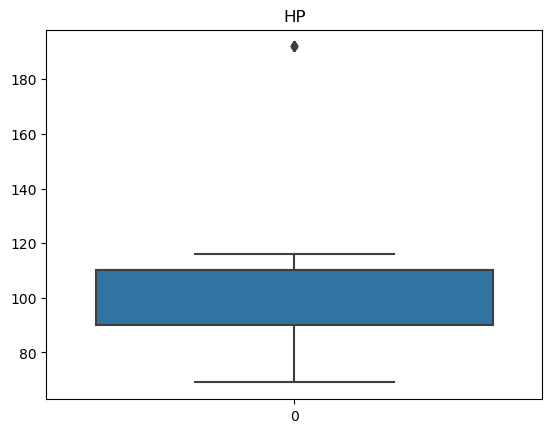

In [101]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

<Axes: >

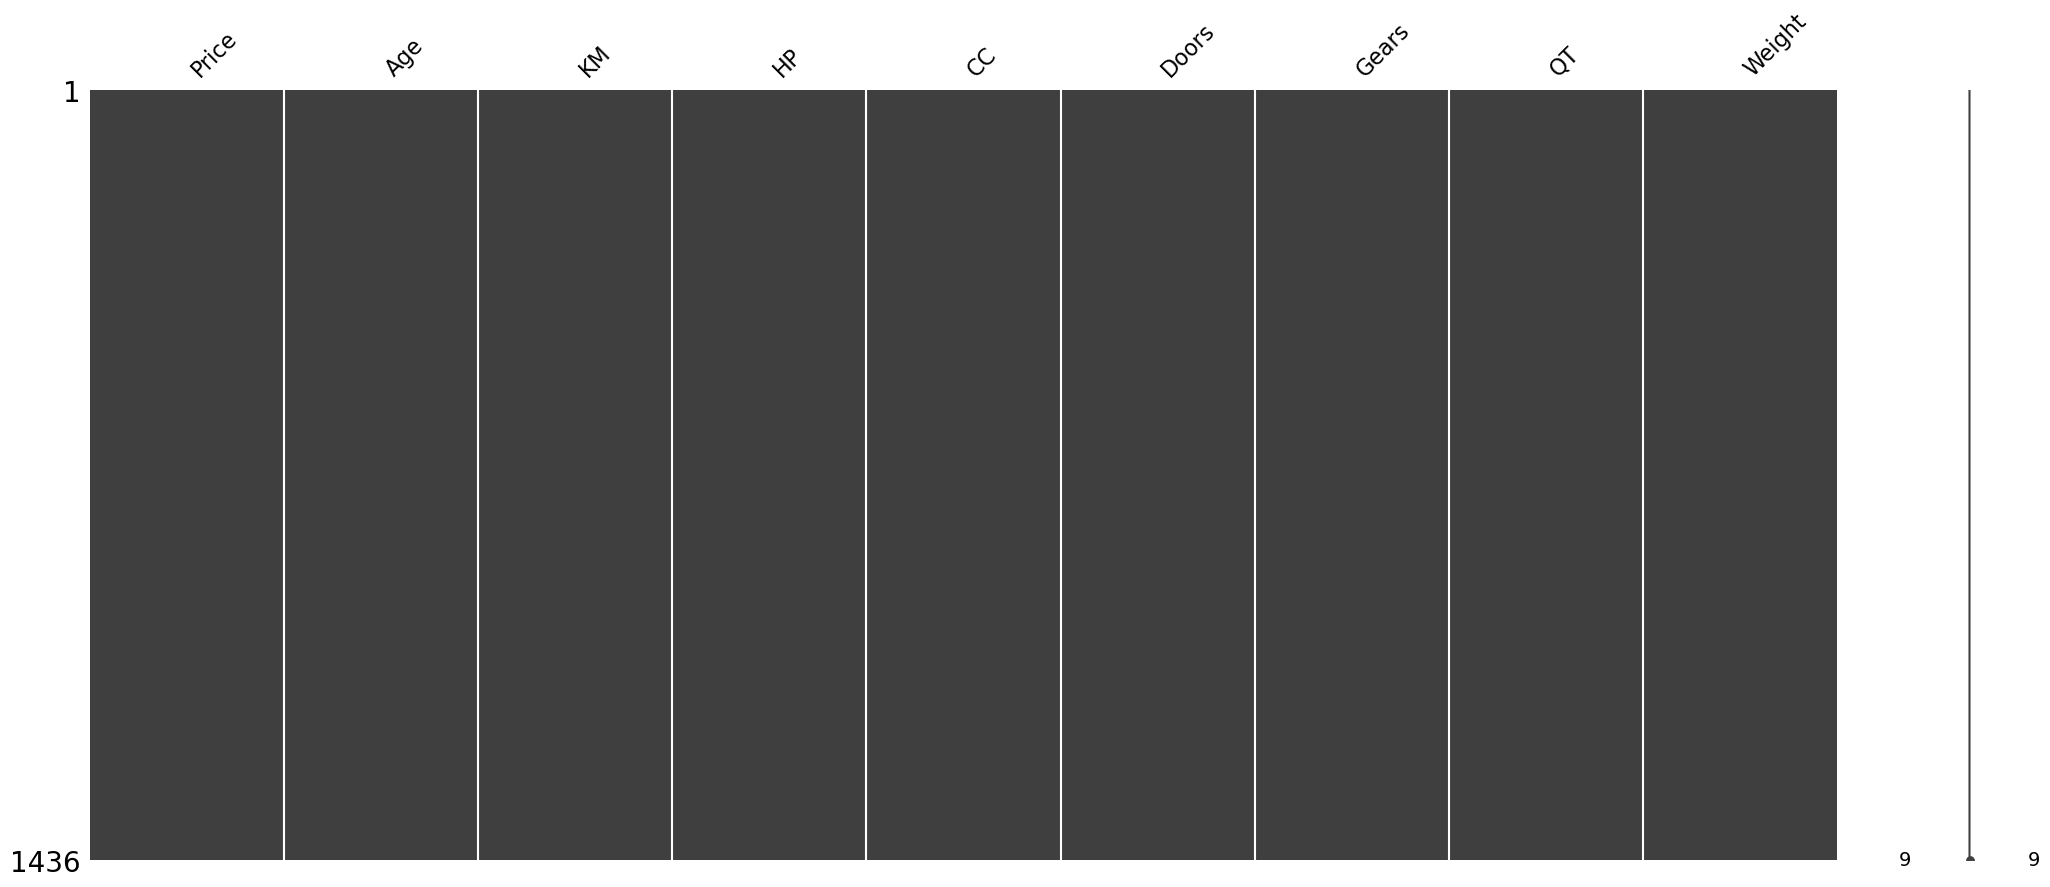

In [102]:
mn.matrix(data)

#### ^Observation: After checking above there is no null value present in the dataset 

### Checking for Duplicated Values

In [103]:
data[data.duplicated()].shape

(1, 9)

In [104]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [105]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### ^Observation: There are duplicated values in the dataset
+ Hence, we dropped those values

### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [106]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [107]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


## Exploratory Data Anlaysis

### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [108]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

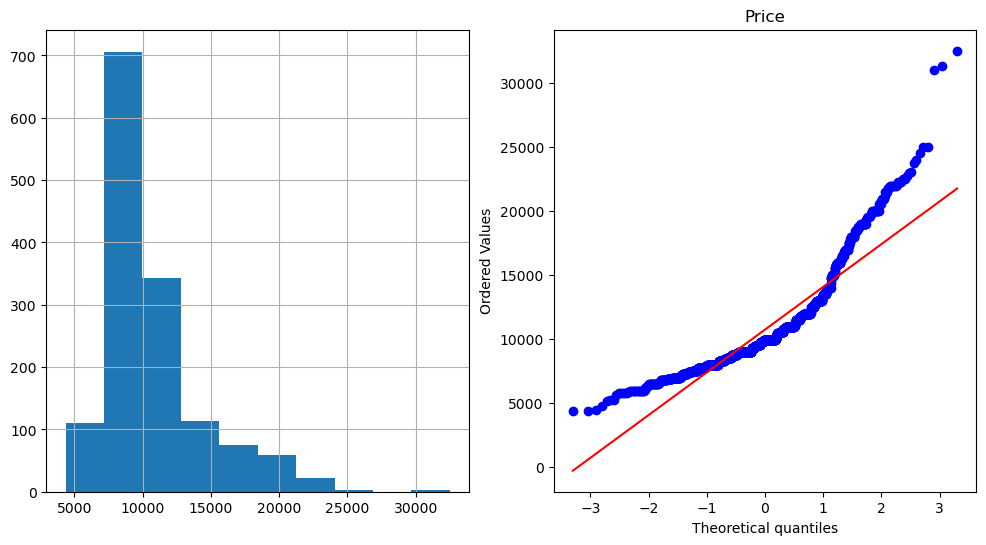

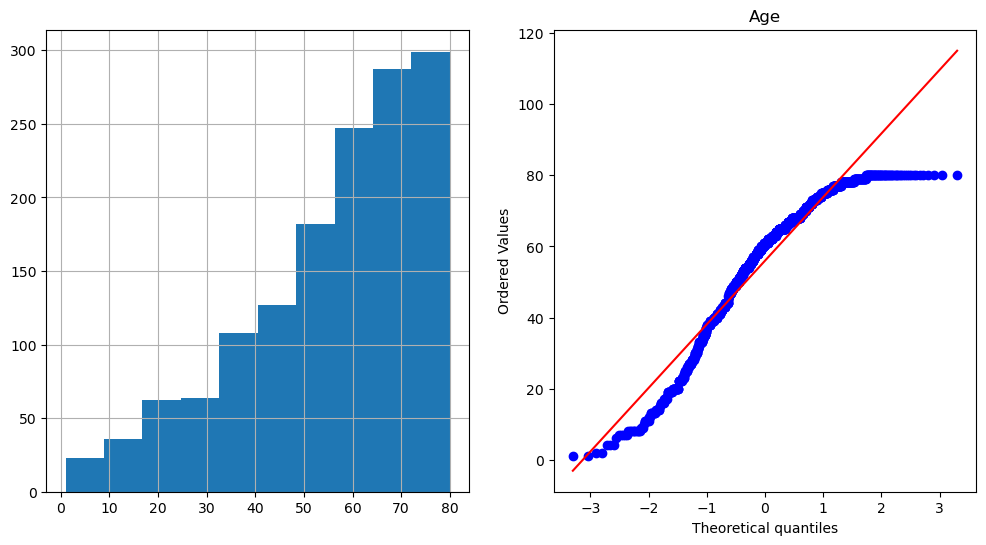

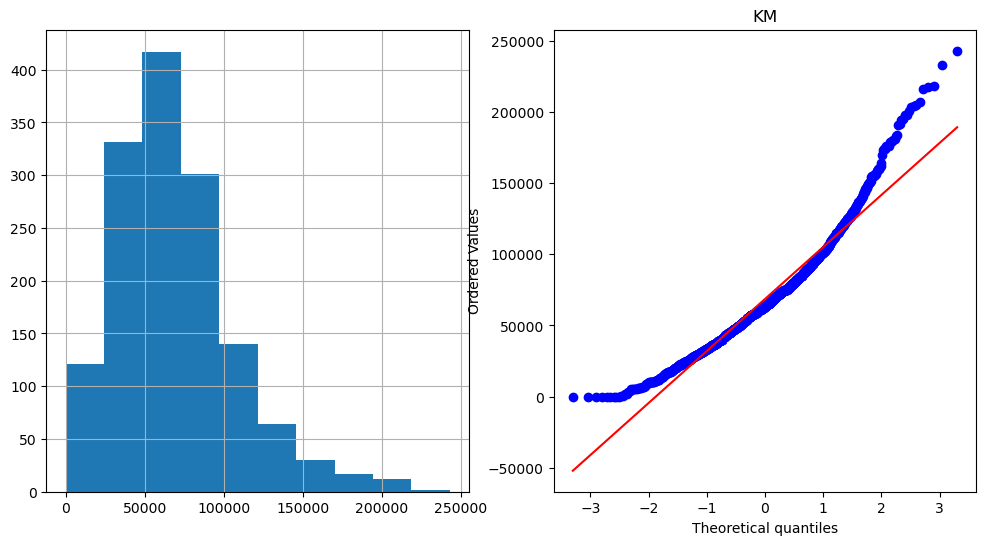

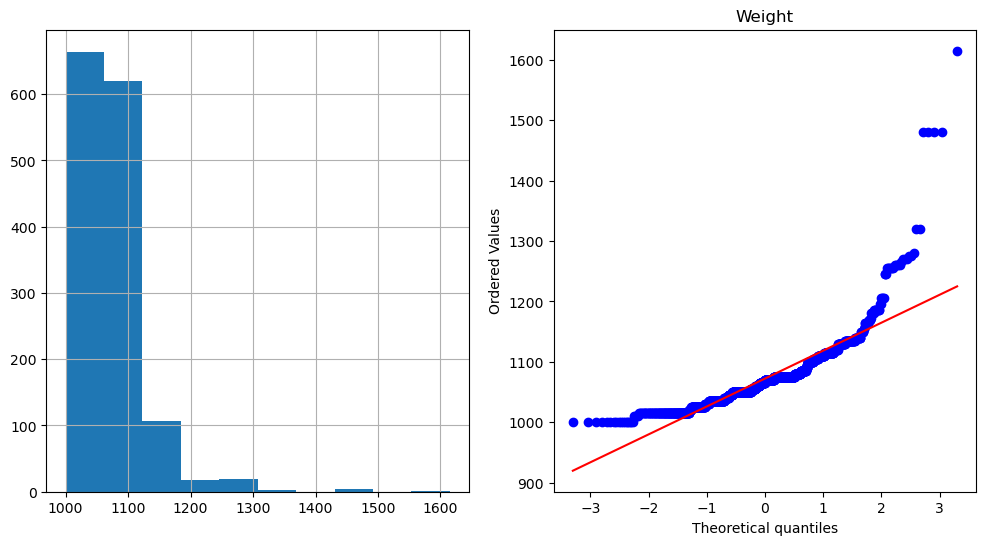

In [109]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

### Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

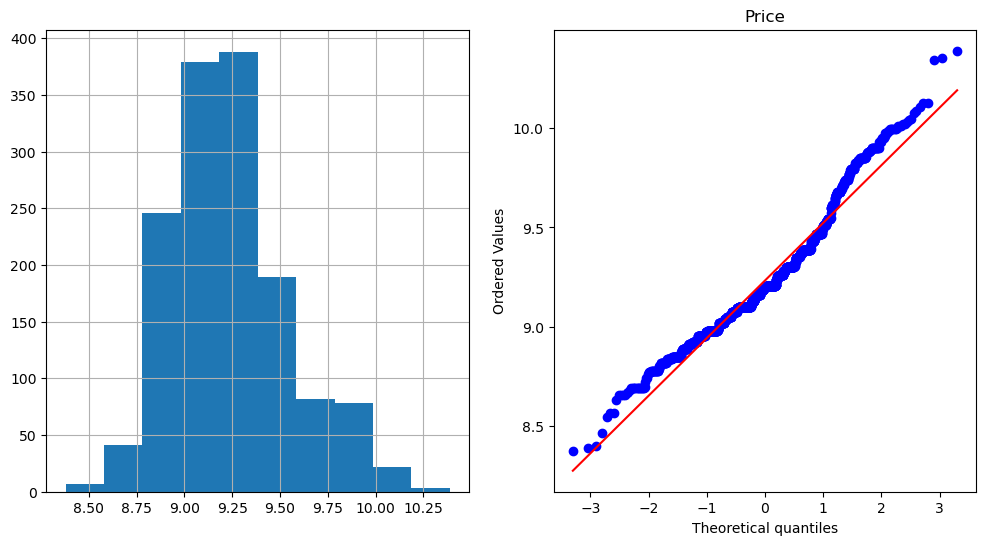

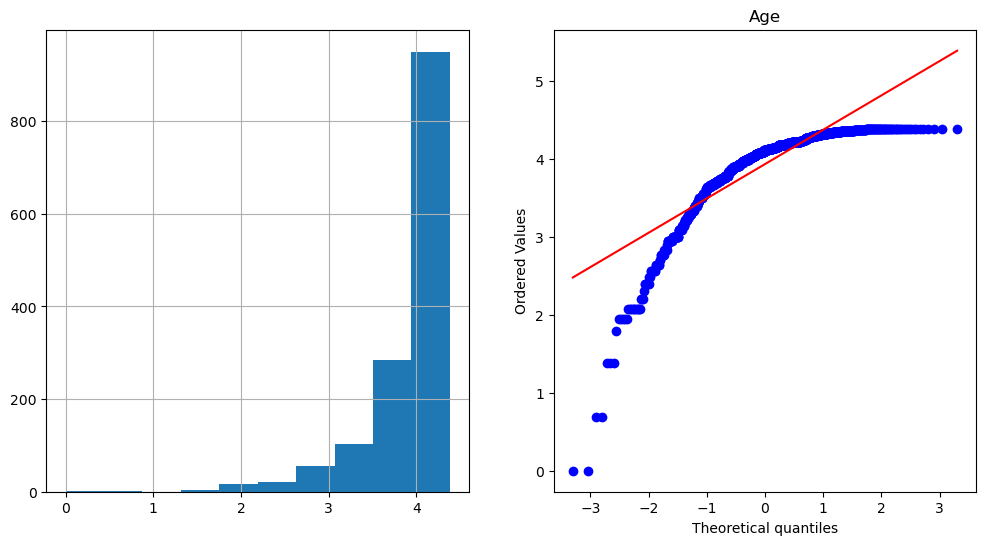

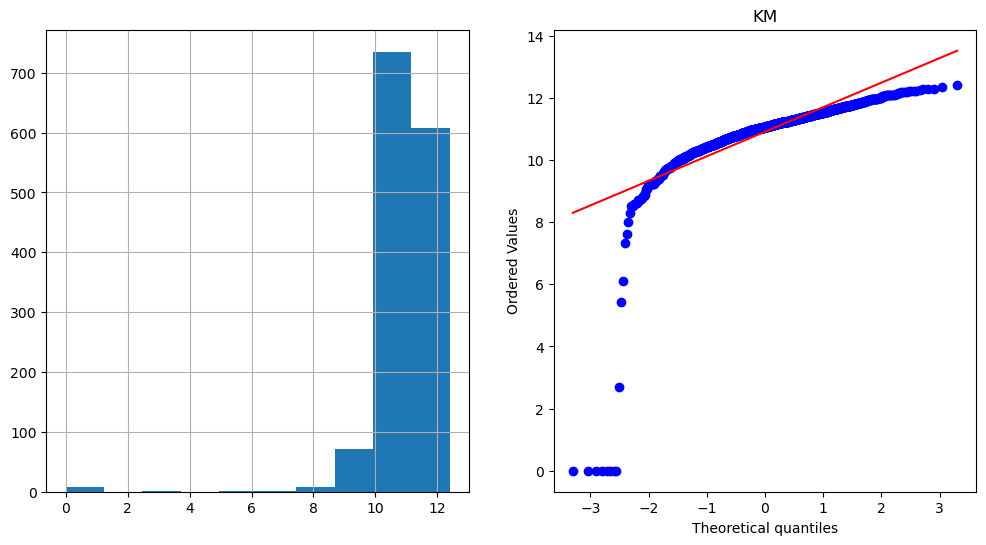

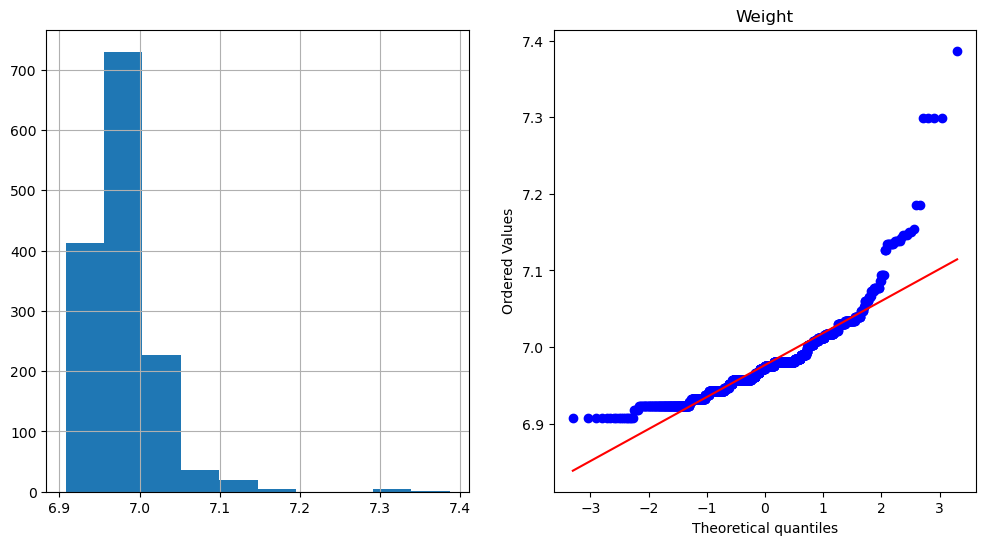

In [110]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

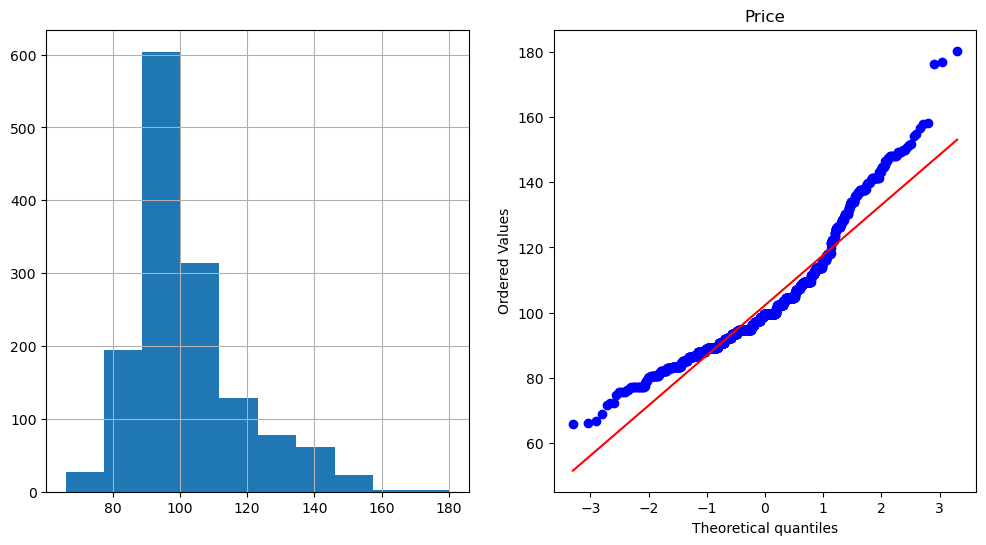

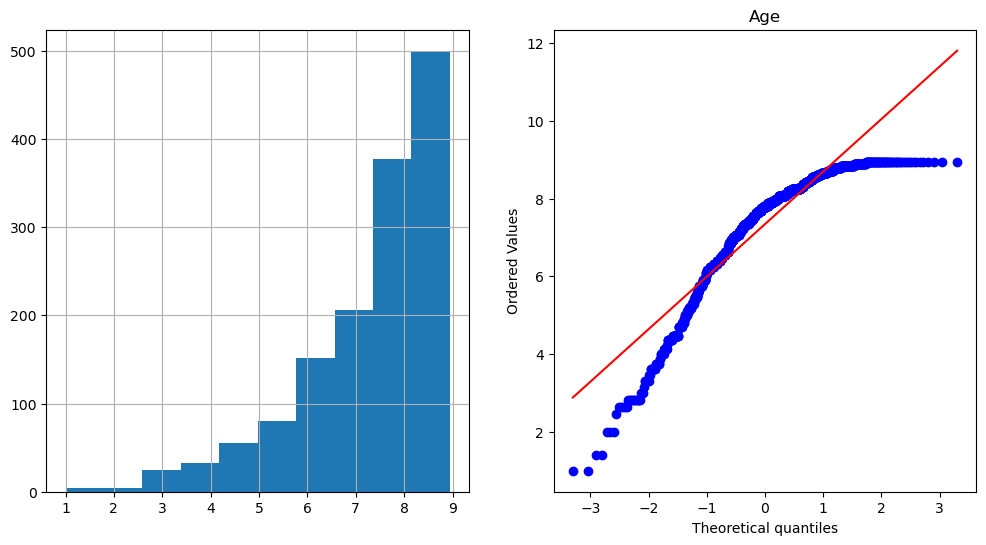

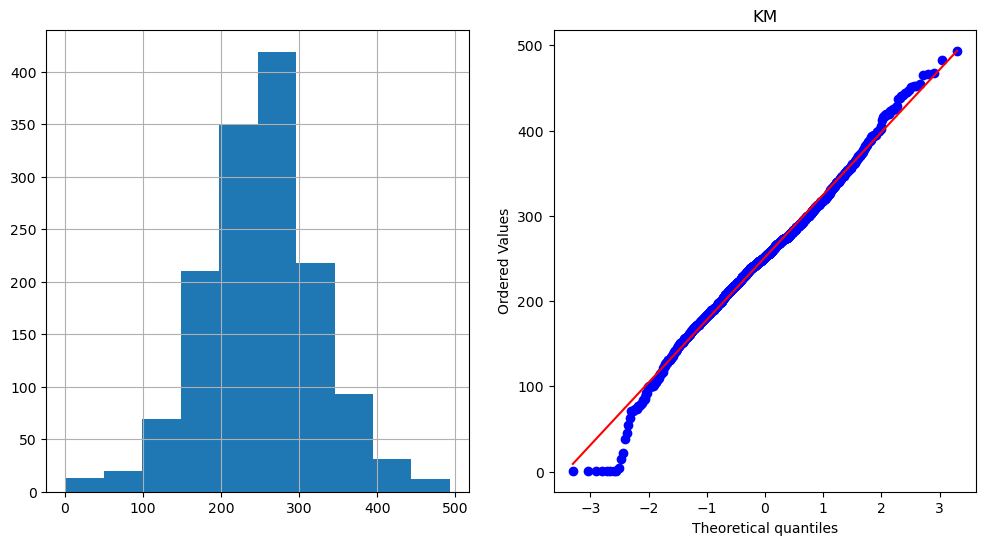

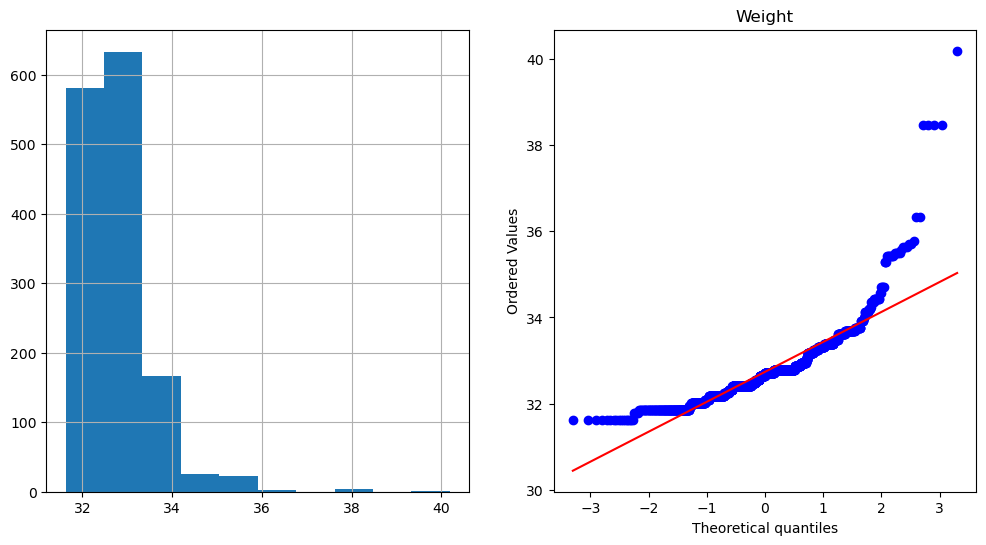

In [111]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

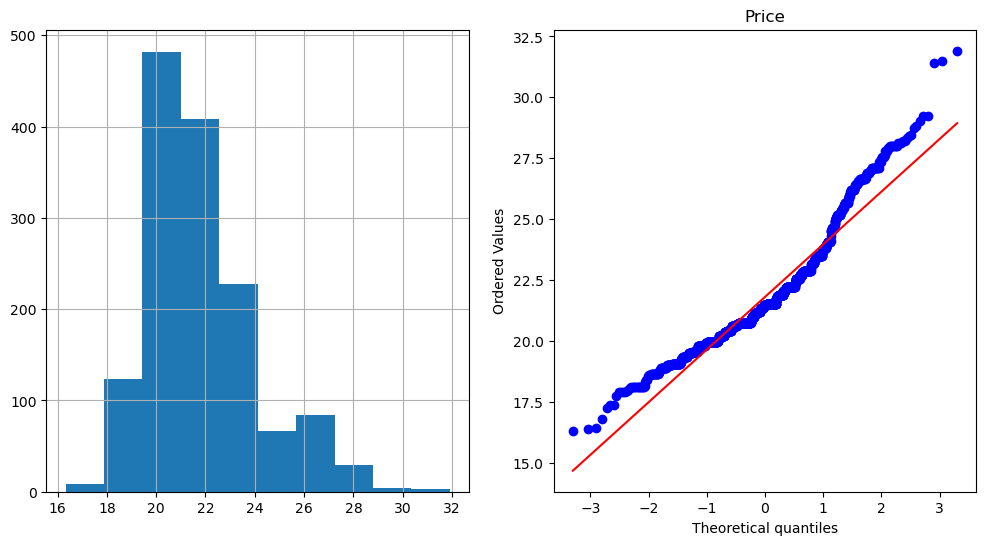

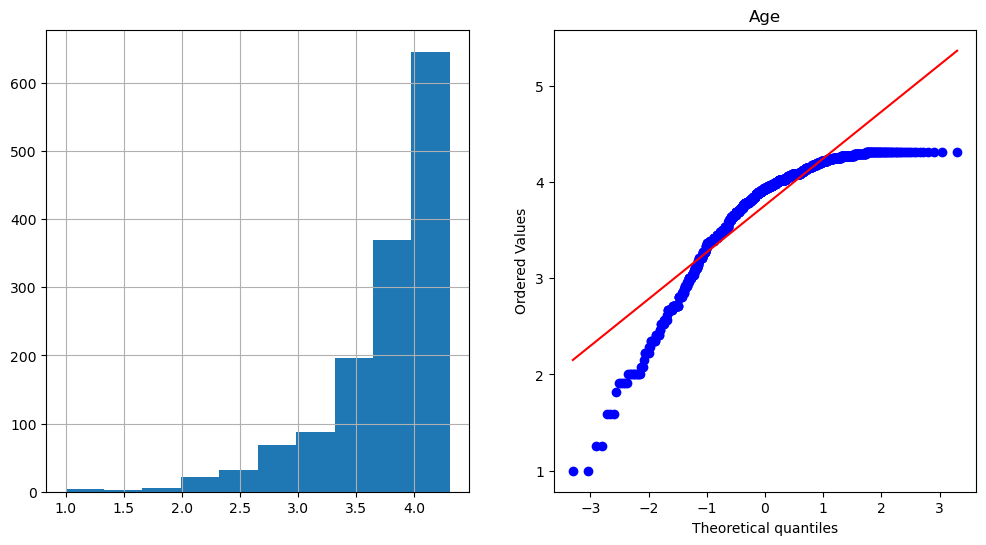

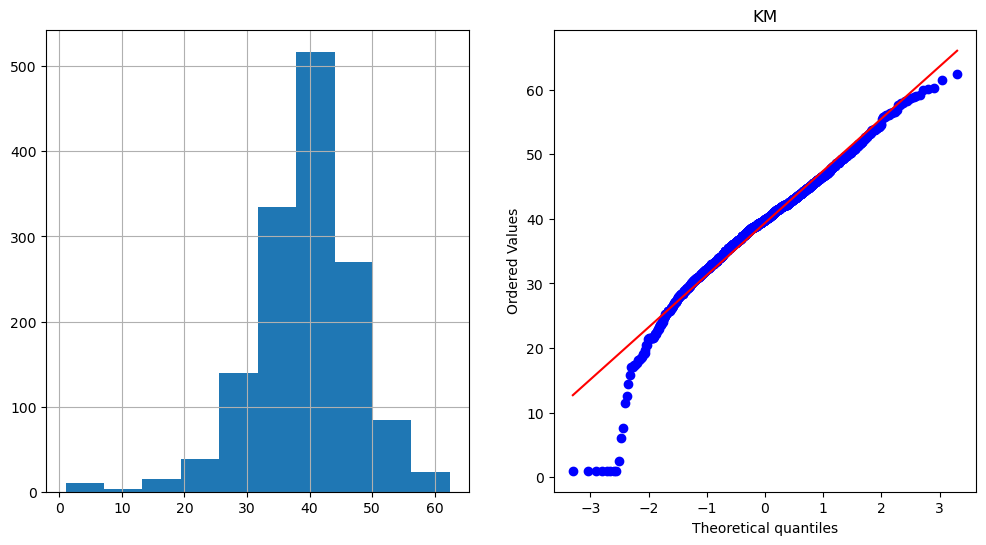

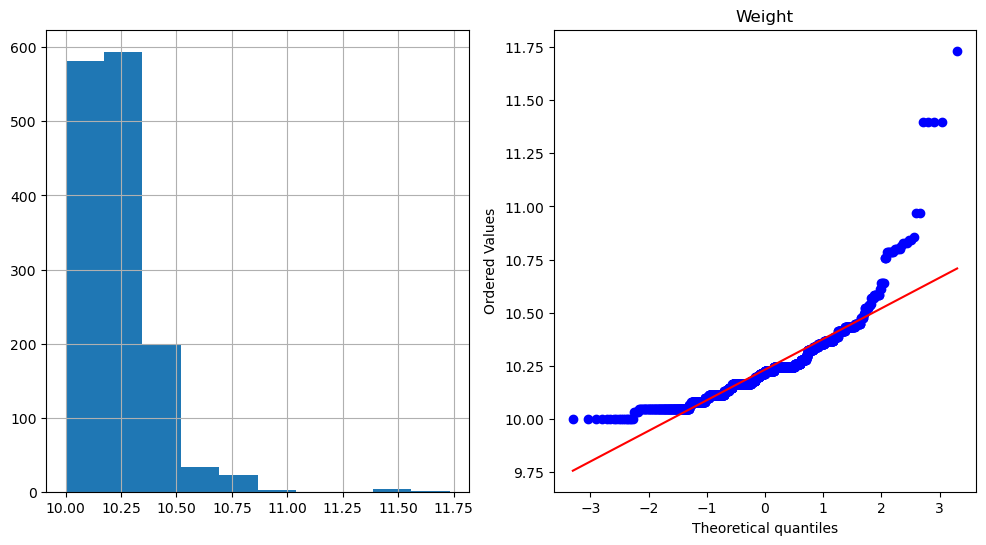

In [112]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

+ <b>Note:</b> Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

### The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

+ To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [113]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [114]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


#### ^Observation: Since the p-values are less than .05, we reject the null hypothesis.
+ We have sufficient evidence to say that the sample data does not come from a normal distribution.

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

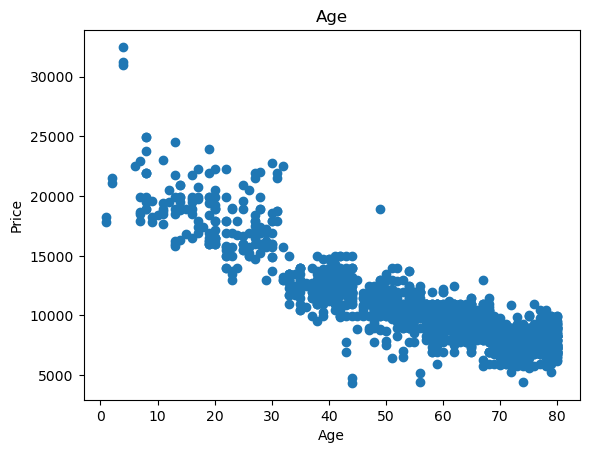

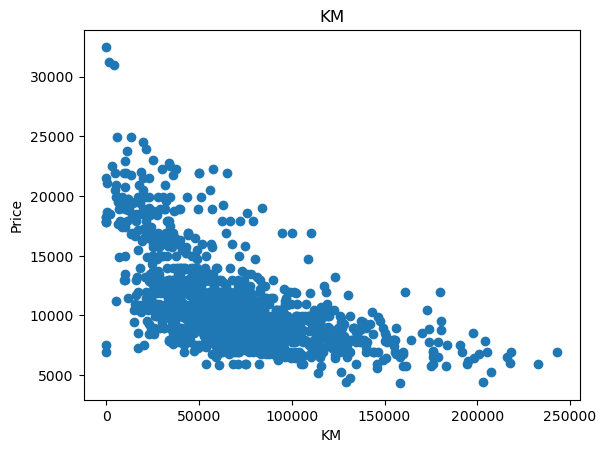

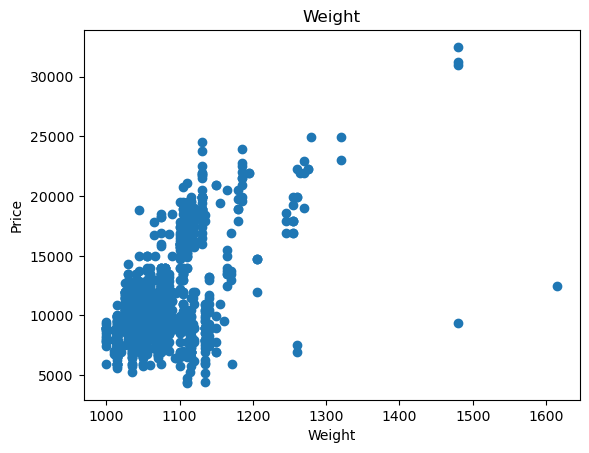

In [115]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

#### ^Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

### Lets analyze the relationship between the discrete variables and Price

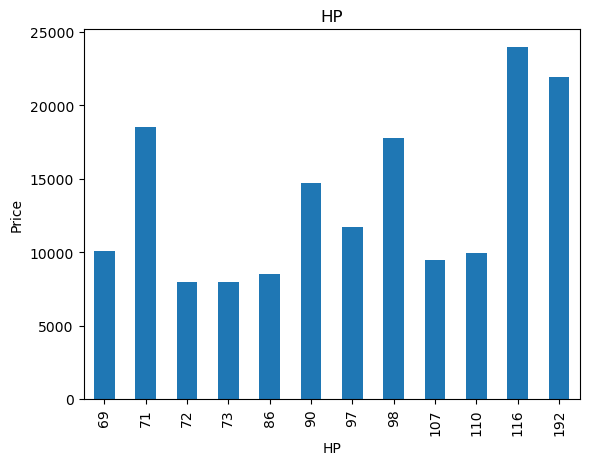

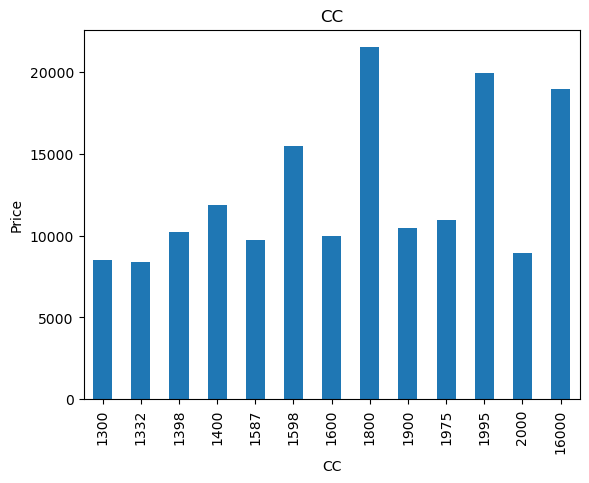

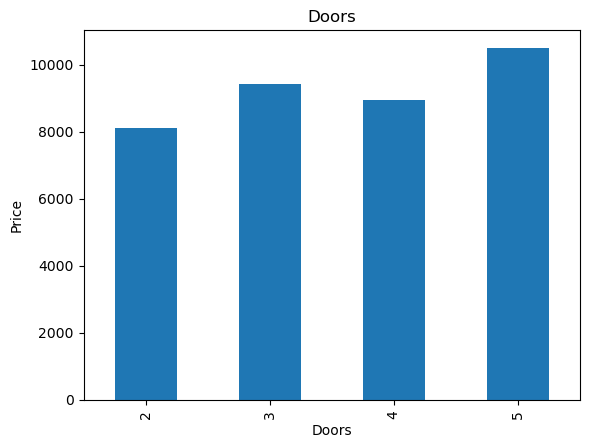

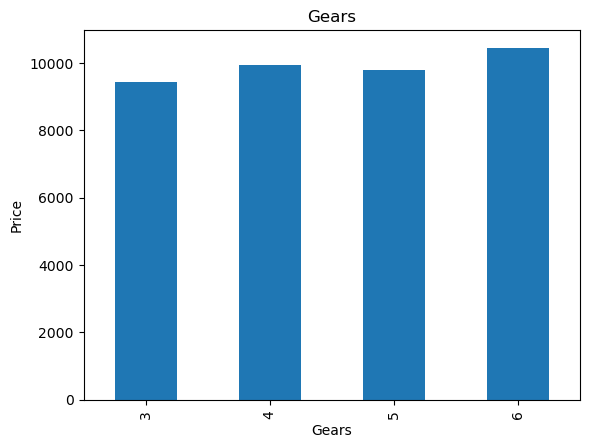

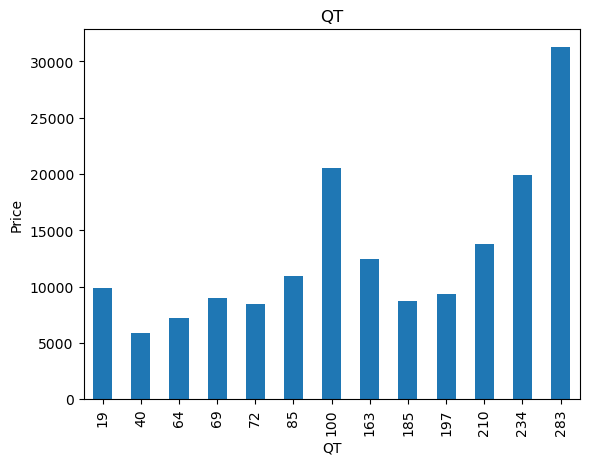

In [116]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

#### ^Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

### Visualizing Continuous Datatype for Outlier Detection

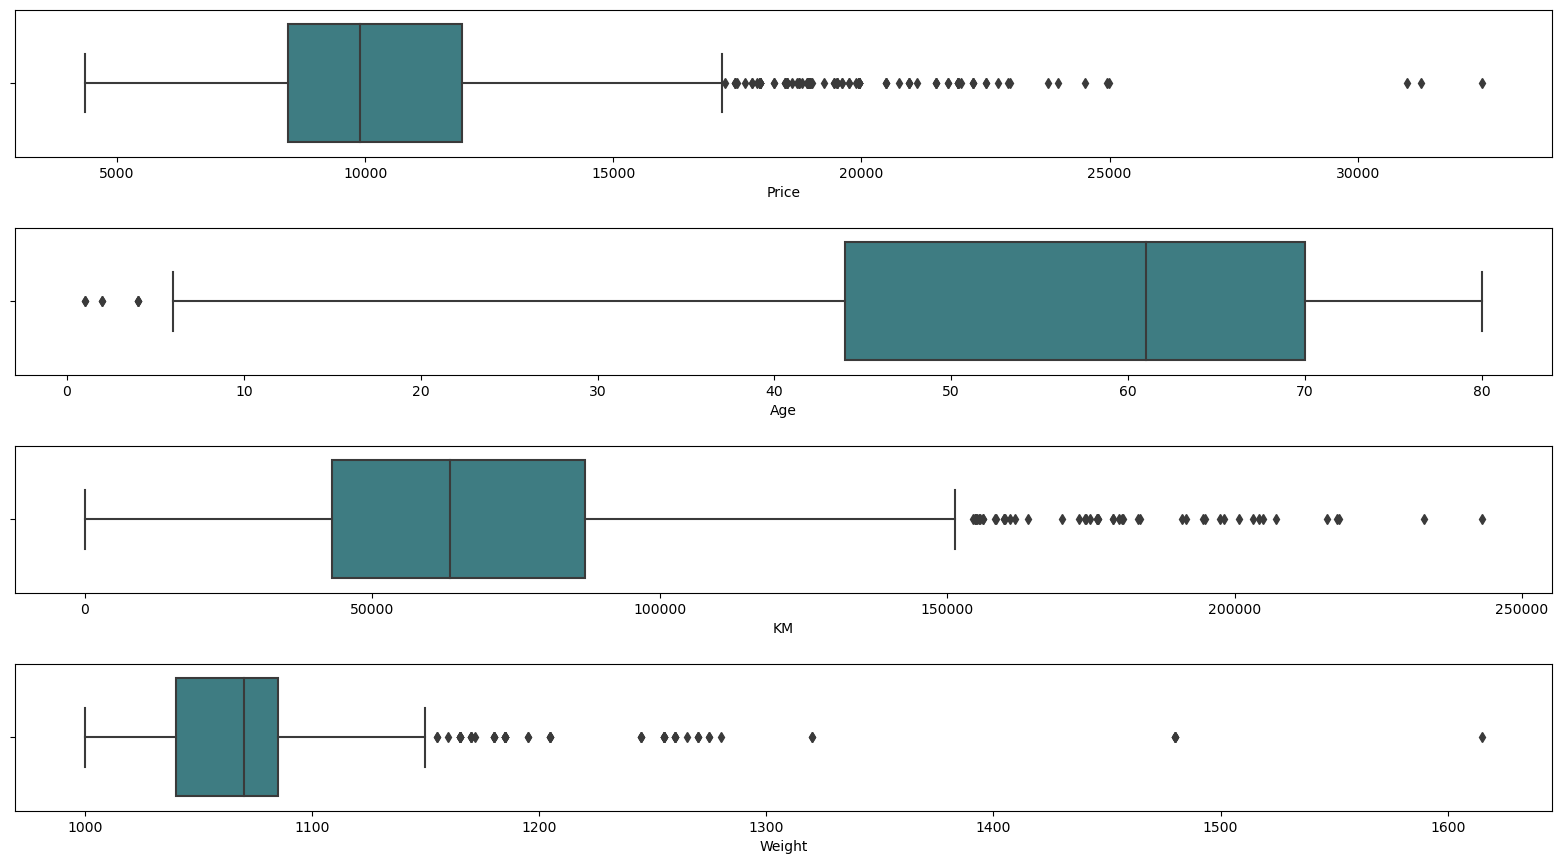

In [117]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### ^Observation: A significant amount of outliers are present in each continuous feature
<b>Note:
+ We can't simply remove the outliers that would mean loss of information
+ We need to try different types of transformation or imputation and select the one with the best results
+ <b>Note:</b> Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values

### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

### Let's try Median Imputation to handle Outlier in Profit

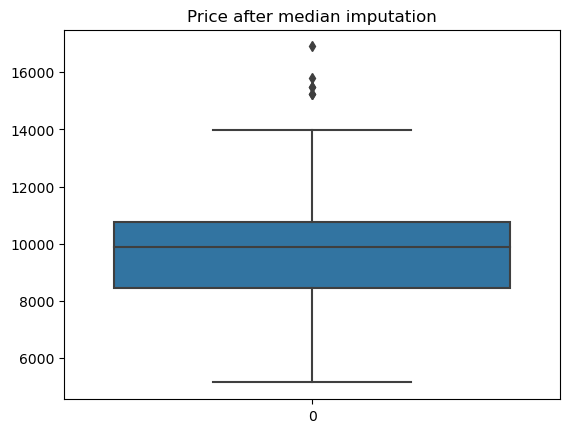

In [118]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

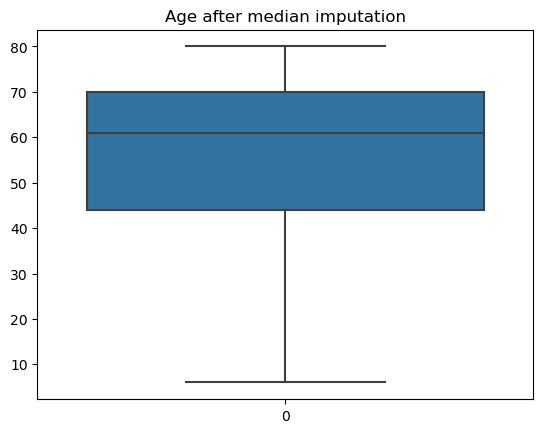

In [119]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

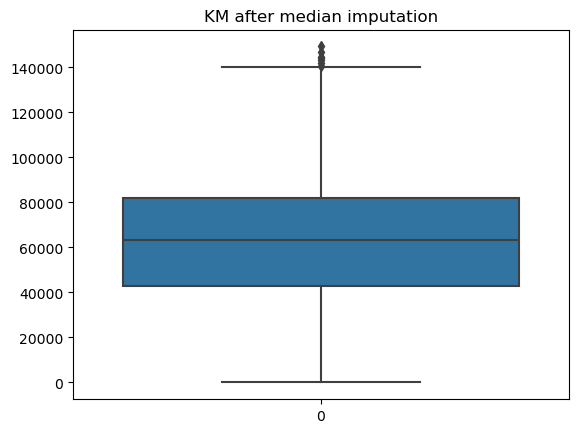

In [120]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

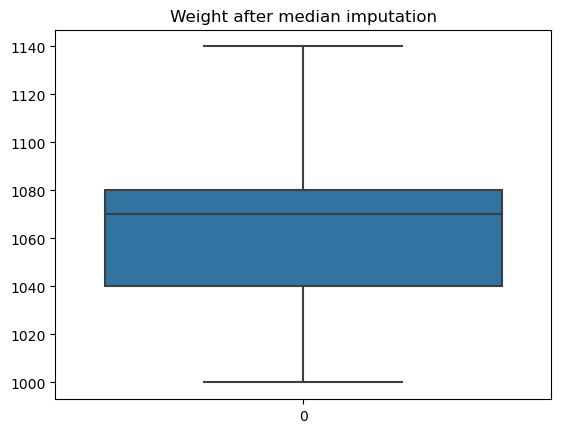

In [121]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

### Let's test our data in model and find the R-squared with median imputation data model

In [122]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.34204996085646144, 0.3406706106695777)

### Let's try Mean Imputation to handle Outlier in Profit

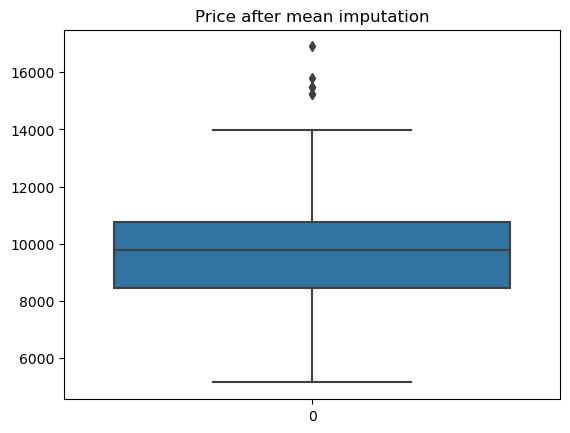

In [123]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

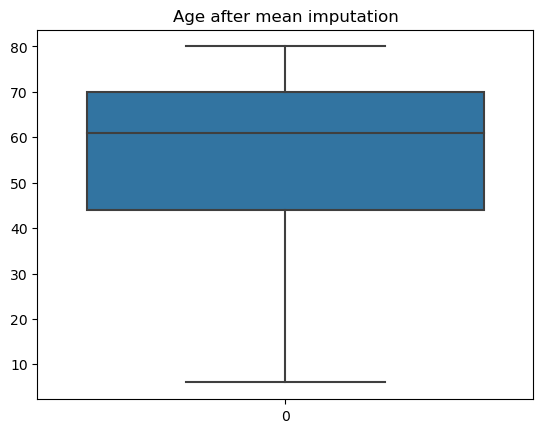

In [124]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

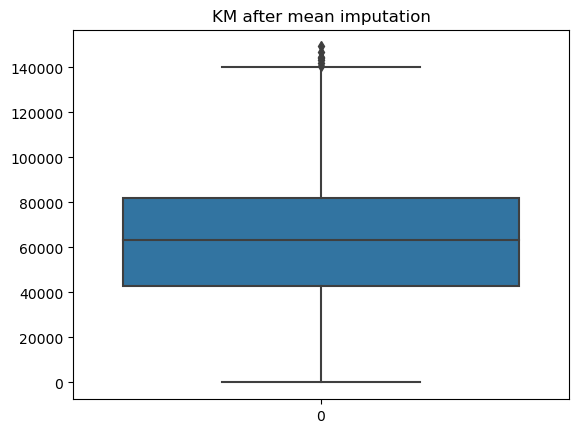

In [125]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

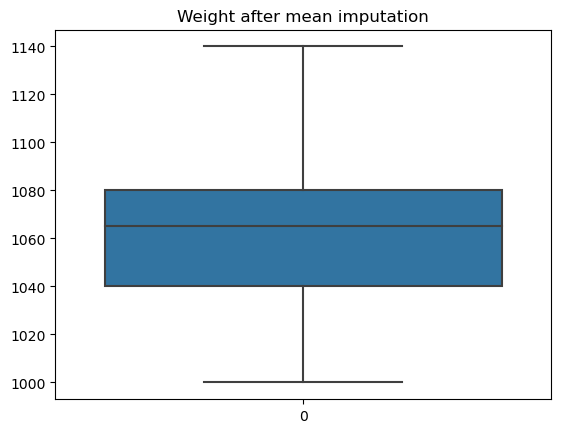

In [126]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

### Let's test our data in model and find the R-squared with mean imputation data model

In [127]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.38796219581713, 0.3866790976951534)

#### ^Observation: As you can see after mean imputation the model is not performing well
+ Now we have to try something else to get out better results than the raw data

#### ^Observation: As you can see even after imputation  the model is not performing well it getting worse 
+ Now we have to try something else to get out model better than the raw data

### The best thing we can do is now to remove the outlier and see the results

In [128]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

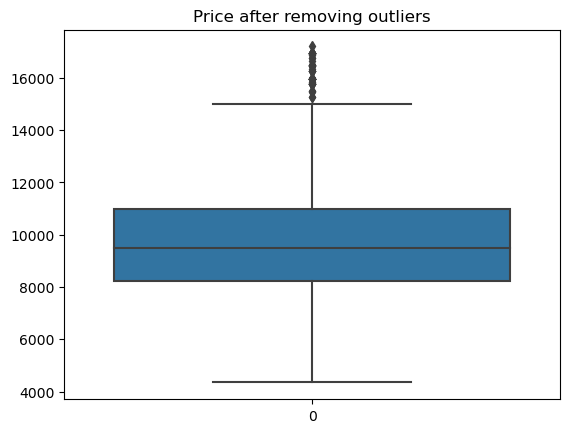

In [129]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

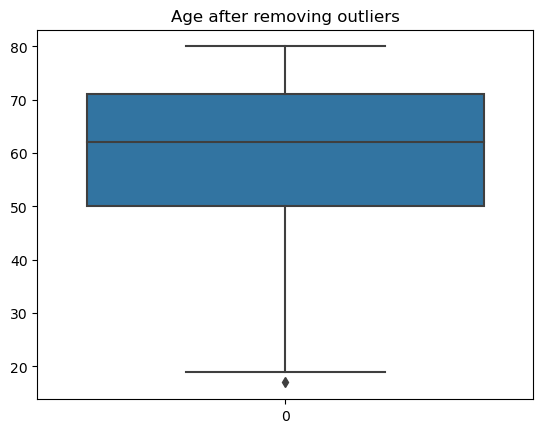

In [130]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

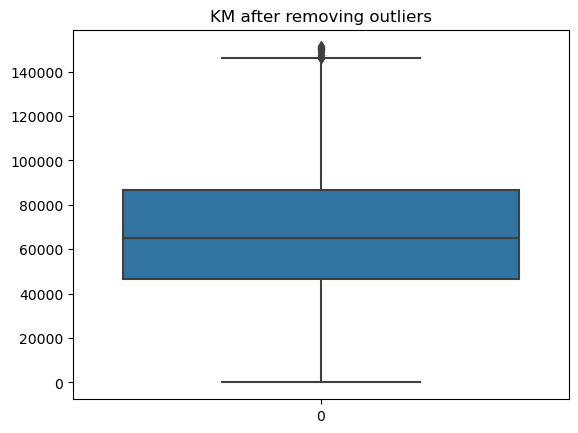

In [131]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

In [132]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

KeyError: 0

#### Let's test our data in model and compare the R-squared with without imputation data model

In [ ]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

In [ ]:
np.sqrt(removed_outlier_model.mse_resid)

#### Let's try log transformation and visualize the result first

In [ ]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [ ]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

#### ^Observation: The outliers are still present

#### Let's try cuberoot transformation and visualize the result first

In [ ]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [ ]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 

#### ^Observation: The outliers are still present

#### ^Observation: After removing Outliers the model performed very poorly than the raw data model
+ Note: We will continue with different technique to deal with that

### Raw Data Model

In [ ]:
data.columns

In [ ]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

In [ ]:
np.sqrt(raw_data_model.mse_resid)

### Detecting Influencers/Outliers in the Model
+ Two Techniques : 1. Cook's Distance & 2. Leverage value

In [ ]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

In [ ]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [ ]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

#### Let's plot the influencers and also plot a cut off line using the stem plot

In [ ]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

In [ ]:
data[data.index.isin([80])] 

#### Let's improve the model by deleting the influence point and creating a new dataframe 

In [ ]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

In [133]:
data.shape

(1435, 9)

### Model Deletion Diagnostics and Final Model

In [134]:
# Another Method
"""k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)"""

'k=dataframe.shape[1]\nn=dataframe.shape[0]\nleverage_cutoff = (3*(k+1))/n\nwhile np.max(c)>leverage_cutoff:\n    model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    (c,_)=model.get_influence().cooks_distance\n    c\n    np.argmax(c) , np.max(c)\n    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)\n    dataframe\nelse:\n    final_model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    final_model.rsquared , final_model.aic\n    print("Thus model accuracy is improved to",final_model.rsquared)'

In [135]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

NameError: name 'raw_data_model' is not defined

In [136]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

NameError: name 'final_model' is not defined

In [137]:
dataframe.shape

NameError: name 'dataframe' is not defined

In [138]:
dataframe.head()

NameError: name 'dataframe' is not defined

NameError: name 'dataframe' is not defined

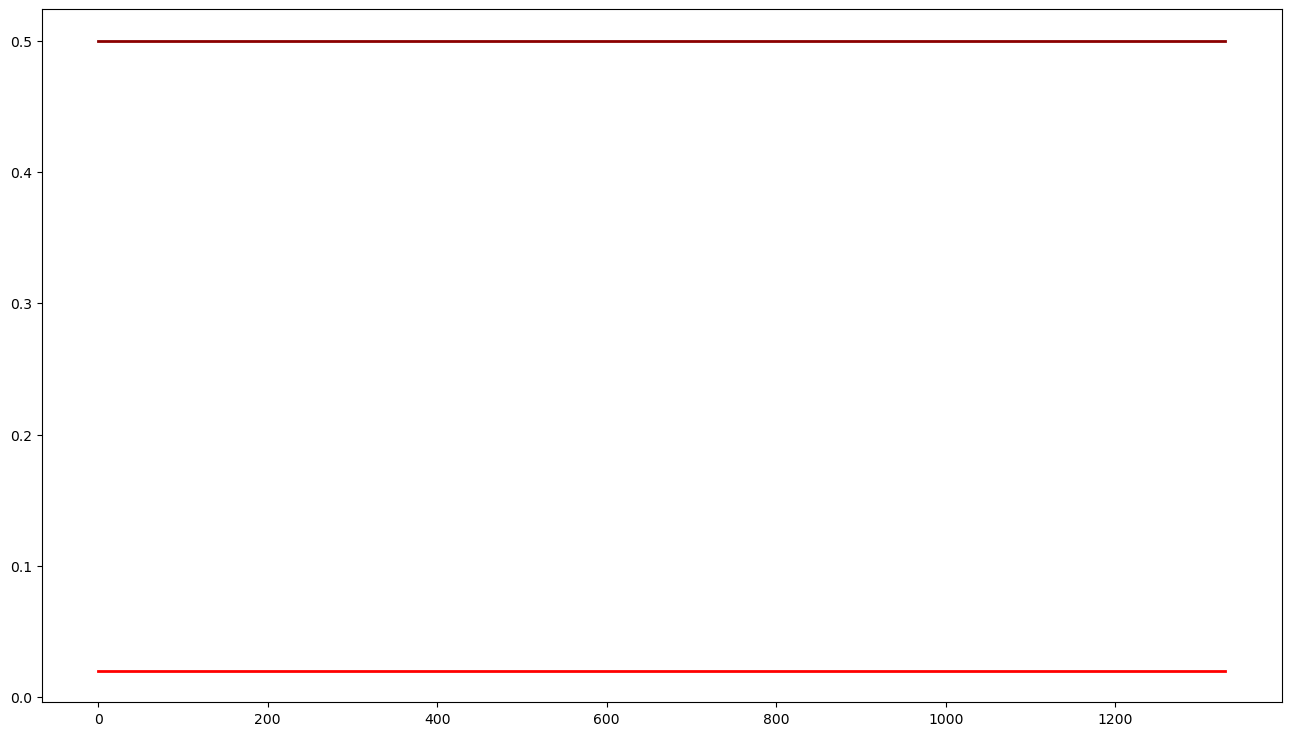

In [139]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### ^Observation: All the points are below our cut-off line 
+ Hence, we can say that there are no influncers present in our model we can proceed with the predictions

In [140]:
final_model.summary()

NameError: name 'final_model' is not defined

In [141]:
np.sqrt(final_model.mse_resid)

NameError: name 'final_model' is not defined

## Feature Engineering

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#### Log-Transformation

In [142]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

NameError: name 'dataframe' is not defined

In [143]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

PatsyError: Error evaluating factor: NameError: name 'CC' is not defined
    Price~Age+KM+HP+CC+Doors+Weight
                    ^^


#### Cube-Root Transformation

In [ ]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

In [ ]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

#### Square-Root Transformation

In [ ]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

In [ ]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

#### Let's try Robust transformation

The Robust Scaler, as the name suggests is not sensitive to outliers.
+ This scaler removes the median from the data 
+ Scales the data by the InterQuartile Range(IQR)

The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [ ]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

In [ ]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

In [ ]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

#### ^Observation: After the transformation and building models the R-Squared had varince with respect to other transformations
+ But standard scaler is better than raw data model and other models with better AIC, BIC log-likelihood scores
+ We have to perform model validation test to check which model is better will do at the end of this

## For building Multi Linear Resgression there are assumption regarding the data set. 
## They are as follows:-
1. <b>Feature should be independent of each other there should'nt be any dependency upon each other
2. <b>There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
3. <b>Each Feature and Model Error (residuals) should be independent of each other
4. <b>Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
5. <b>There should be a linear relation between the dependent variable and Independent variables

#### We will Check the above one by one

### Preparing a Model

In [144]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

NameError: name 'df_standard_scaled' is not defined

+ <b>Summary
The values we are concerned with are -

The coefficients and significance (p-values) R-squared F statistic and its significance

1. R - squared is 0.896 Meaning that 89.9% of the variance in cnt with registered

This is a decent R-squared value.

3.F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

<b>Note:</b> If any of the above step is not followed our model can't be a good predictor

In [145]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

NameError: name 'model' is not defined

<Figure size 1600x900 with 0 Axes>

#### ^Observation No Linear Relation found in QT Feature with the Dependent feature

### Model Testing
#### As Y = Beta0 + Beta1*(X1) + Beta2*(X2) +Beta3*(X3) + .................. + Beta n*(Xn) 
#### Finding Coefficient Parameters (Beta0 and Beta1's values)

Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

#### Here, (Intercept) Beta0 p_value ~ 1
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

#### ^Observation: If the p-value is not less than .05 for Gears features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features dependency towards the dependent variable

+ Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

+ Maybe we could drop some?

+ We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
+ This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'df_standard_scaled' is not defined

In [147]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

NameError: name 'dataframe' is not defined

In [148]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

NameError: name 'vif_doors' is not defined

#### <b>Note:</b> We generally want a VIF that is less than 5. As you can see QT has the highest value among others lets investigate

In [149]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~QT', data=df_standard_scaled).fit()
qt_model.summary()

NameError: name 'df_standard_scaled' is not defined

In [150]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

NameError: name 'df_standard_scaled' is not defined

In [151]:
gears_qt_weight_model = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

NameError: name 'df_standard_scaled' is not defined

#### Significance level - Backward elimination
We have different techniques to find out the features which have the maximum effect on the output.

Here we are going to look at the Backward elimination.

In this process we need to add one column of ones in the starting of the column.

In backward elimination we delete the value one by one whose significance level is less.

i.e In general we have a P-value and a significance level

P_value = 1 - (minus) significane level

or in other terms

p_value+ significance level = 1

if P_value is high significance level is less.

Hence we will be deleating features one by one whose P_value is high which means it has less significance level.

By eliminating process we get to the values which are of most significance

#### Model1
+ Dropping the variable and updating the model
+ As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0. Let's go ahead and drop this variable

In [152]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

NameError: name 'df_standard_scaled' is not defined

In [153]:
x.columns

AttributeError: 'list' object has no attribute 'columns'

In [154]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_1.summary()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\Lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\site-packages\patsy\eval.py", line 169, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "C:\Users\ACER\anaconda3\Lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
           ~^^^^^
  File "C:\Users\ACER\anaconda3\Lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
           ~^^^^^
TypeError: list indices must be integers or slices, not str

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, se

#### ^Observation: As our Multicollinearity problem has been solved

### Feature Selection Techniques in Machine Learning

### Correlation Coefficient
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

^Observation: Age and KM has the highest score of correlation with Price but a negative correlation
+ <b>Note:</b> QT and Weight also have a collinearity among themselves which will affect our model.
+ <b>Note:</b> KM and Age also have a collinearity among themselves which will affect our model.

## PCA
<b>Principal Component Analysis (PCA)</b> was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as <b>1901</b>. It is very popular because it is <b>fast, easy to implement and easy to interpret.

PCA works by finding a low dimensional subspace that <b>maximises the variance</b> of the data in that subspace and performing a <b>linear projection.</b> This basically means the data will be as <b>spread out</b> as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

### Principal Component Analysis
Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

#### PCA Review

![Filter Method](https://github.com/krishnaik06/Dimesnsionality-Reduction/raw/67a479eaaac811803a7a00bf182062e888d3fd8b//PCA.png)

### PCA on Standard Scaled Dataset

##### Explained variance

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

#### Let's seperate the x and y values 

In [ ]:
df_standard_scaled.head()

In [ ]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

In [ ]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [ ]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

In [ ]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [ ]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

##### As you can see just by 5 feature we get a variance of more than 90%

In [ ]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

In [ ]:
dataframe.Price

In [ ]:
pca_std_df['Price'] = y
pca_std_df.head()

In [ ]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

In [ ]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

In [ ]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

In [ ]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

### Forward Selection 

Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

I will demonstrate the Step Forward feature selection algorithm from mlxtend using the House Price dataset.

In [ ]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

In [ ]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)

In [ ]:
sfs1.k_feature_idx_

In [ ]:
x_train.columns[list(sfs1.k_feature_idx_)]

#### Observation: For the above case we can say these 4 features are enough to get a higher R-squared value

### Regularization <a class="anchor" id="4.3"></a>
You have your model ready, you have predicted your output. So why do you need to study regularization? Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable. So you applied linear regression and predicted your output. Voila! You are on the leaderboard. But wait what you see is still there are many people above you on the leaderboard. But you did everything right then how is it possible?

“Everything should be made simple as possible, but not simpler – Albert Einstein”

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

In [ ]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + CC + Doors + Weight + QT + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

In [ ]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

We can see that coefficients of Gears(last 1) is much higher as compared to rest of the coefficients. Therefore the total Price would be more driven by this feature.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.

### Ridge Regression <a class="anchor" id="4.3.1"></a>
Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [45]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

TypeError: Ridge.__init__() got an unexpected keyword argument 'normalize'

+ Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

Here we have consider alpha = 0.05. But let us consider different values of alpha and plot the coefficients for each case.

In [46]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

NameError: name 'ridgeReg' is not defined

In [47]:
ridgeReg.coef_.flatten()

NameError: name 'ridgeReg' is not defined

In [48]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

NameError: name 'ridgeReg' is not defined

In [49]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01')

NameError: name 'coef_df' is not defined

In [50]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

NameError: name 'coef_df' is not defined

In [52]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

NameError: name 'coef_df' is not defined

In [53]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

NameError: name 'coef_df' is not defined

In [54]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

NameError: name 'coef_df' is not defined

You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

In [55]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [56]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

NameError: name 'x_train' is not defined

In [57]:
# here, again I will train a Ridge Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Ridge"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

NameError: name 'SelectFromModel' is not defined

#### Important Points:
It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

It reduces the model complexity by coefficient shrinkage.

It uses L2 regularization technique. (which I will discussed later)

Now let us consider another type of regression technique which also makes use of regularization

### LASSO Regression

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

I will demonstrate how to select features using the Lasso regularisation on the House Price dataset from Kaggle.

In [58]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

TypeError: Lasso.__init__() got an unexpected keyword argument 'normalize'

In [59]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

NameError: name 'lassoReg' is not defined

Again lets change the value of alpha and see how does it affect the coefficients.

In [60]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

NameError: name 'lassoReg' is not defined

In [61]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

NameError: name 'coef_df' is not defined

In [62]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

NameError: name 'coef_df' is not defined

So, we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot. By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

In [63]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [64]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

In [ ]:
sel_lasso.get_support()

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

In [ ]:
x_train.columns[(sel_lasso.get_support())]

#### Let's compare the residuals of all the models to come up with an conclusion

#### Model Validation
#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [ ]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

In [ ]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [ ]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [ ]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

#### Let's compare the Root Mean Squared Error and check for the minimum value 

In [ ]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

#### ^Observation: The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.
+ Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared
+ <b> Note: We are going to rebuild the model by using that model

In [ ]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = x).fit()
# Finding rsquared values
Final_model.summary()

#### Residual Analysis
+ Test for Normality of Residuals (Q-Q Plot)

In [ ]:
#Residuals values  = y - yhat
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

### Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### ^Observation: Constant Variance (Homoscedasticity) in Error

#### Residual VS Regressors

+ Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

#### ^Observation: 
+ Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP
+ Only KM and Age is having a linear relation with the Price Feature

### Predicting values from Model using same dataset

In [ ]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

In [ ]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

In [ ]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

## Preparing a table containing $R^2$ value for each prepared model

In [ ]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

### Visualizing Models Performance

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [ ]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [ ]:
x_train.shape

In [ ]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

In [155]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

NameError: name 'y_test' is not defined